**Regression with Simulated Data**<br/>
Prof. Dr. Jan Kirenz <br/>
Hochschule der Medien Stuttgart

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1-Generate-data" data-toc-modified-id="1-Generate-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1 Generate data</a></span><ul class="toc-item"><li><span><a href="#Set-seed" data-toc-modified-id="Set-seed-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Set seed</a></span></li><li><span><a href="#Task-a)" data-toc-modified-id="Task-a)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Task a)</a></span></li><li><span><a href="#Task-b)" data-toc-modified-id="Task-b)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Task b)</a></span></li></ul></li><li><span><a href="#Task-4-c)" data-toc-modified-id="Task-4-c)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Task 4 c)</a></span></li><li><span><a href="#Task-d)" data-toc-modified-id="Task-d)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Task d)</a></span></li><li><span><a href="#Task-e)" data-toc-modified-id="Task-e)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Task e)</a></span></li><li><span><a href="#Task-f)" data-toc-modified-id="Task-f)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Task f)</a></span><ul class="toc-item"><li><span><a href="#Task-g)" data-toc-modified-id="Task-g)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Task g)</a></span></li></ul></li><li><span><a href="#Task-h)" data-toc-modified-id="Task-h)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Task h)</a></span></li><li><span><a href="#Task-i)" data-toc-modified-id="Task-i)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Task i)</a></span></li><li><span><a href="#Task-j)" data-toc-modified-id="Task-j)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Task j)</a></span></li></ul></div>

In [1]:
# Python set up (load modules) 
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 
plt.style.use('ggplot') 
import seaborn as sns  
sns.set() 
from IPython.display import Image 

# Application 2: Linear regression with simulated data

In this application you will create some simulated data and fit simple linear regression models to it. 

IMPORTANT: Make sure to use **set.seed(1)** prior to starting part (a) to ensure consistent results.


(a) Create a vector, **X** , containing 100 observations drawn from a N (0, 1) dis-tribution. This represents a feature, X .

(b) Create a error vector, **err** (error), containing 100 observations drawn from a N(0, 0.25) distribution i.e. a normal distribution with mean zero and standard deviation 0.25.

(c) Using X and err, generate a vector **Y** according to the model: **Y = −1 + 0 .5 X + err** (model 1). This is the "true" relationship between Y and X, also called a **population model** with known parameters. Questions: what is the length of the vector Y? What are the values of $β_0$ and $β_1$ in this linear (population) model?

(d) Create a scatterplot displaying the relationship between X and Y. Comment on what you observe.

(e) Now fit a least squares linear model (this is our model 2) to predict Y using X (which will yield $\hat{Y}$). Comment on the model obtained (use .summary() and the mean squared error of the residuals). How do $\hat{β_0}$ and $\hat{β_1}$ of model 2 compare to $β_0$ and $β_1$ of the (real) population model (i.e. model 1)?

(f) Display the least squares regression line on the scatterplot obtained in (d) in the color red. Furthermore, draw the population regression line (model 1) on the plot in blue color. Add a legend.

(g) Now fit a polynomial regression model that predicts Y using X and $X^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer.

(h) Repeat (a)–(f) after modifying the data generation process in such a way that there is **less noise** in the data. The model 1 should remain the same. You can do this by decreasing the standard deviation of the normal distribution used to generate the **err** (error) term in (b) (use sd = 0.05). Describe your results.

(i) What are the confidence intervals for $β_0$ and $β_1$ based on the original data set (used in e) and the less noisy data set (created in h)? Comment on your results.

(j) What are the standard errors for $β_0$ and $β_1$ based on the original data set (used in e) and the less noisy data set (created in h)? Comment on your results.

---

*Sources*

*James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning. New York: Springer.*

---

## 1 Generate data


### Set seed

We use it to generate a sequence of random numbers. The seed enables us to use the same random numbers multiple times.

In [2]:
# Set seed
np.random.seed(1)

### Task a)

Create a vector, **X**, containing 100 observations drawn from a N (0, 1) distribution. This represents a feature, X 

In [3]:
# Normal distributed values, with mean = 0 and sd = 1 (using Numpy)
X = np.random.normal(0, 1, 100)

In [8]:
print(X)

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038  1.46210794 -2.06014071
 -0.3224172  -0.38405435  1.13376944 -1.09989127 -0.17242821 -0.87785842
  0.04221375  0.58281521 -1.10061918  1.14472371  0.90159072  0.50249434
  0.90085595 -0.68372786 -0.12289023 -0.93576943 -0.26788808  0.53035547
 -0.69166075 -0.39675353 -0.6871727  -0.84520564 -0.67124613 -0.0126646
 -1.11731035  0.2344157   1.65980218  0.74204416 -0.19183555 -0.88762896
 -0.74715829  1.6924546   0.05080775 -0.63699565  0.19091548  2.10025514
  0.12015895  0.61720311  0.30017032 -0.35224985 -1.1425182  -0.34934272
 -0.20889423  0.58662319  0.83898341  0.93110208  0.28558733  0.88514116
 -0.75439794  1.25286816  0.51292982 -0.29809284  0.48851815 -0.07557171
  1.13162939  1.51981682  2.18557541 -1.39649634 -1.44411381 -0.50446586
  0.16003707  0.87616892  0.31563495 -2.02220122 -0.30620401  0.82797464
  0.23009474  0.76201118 -0.22232814 -0.20075807  0.1

### Task b)

Create a error vector, **err** (error), containing 100 observations drawn from a N(0, 0.25) distribution i.e. a normal distribution with mean zero and standard deviation 0.25.

In [4]:
# Normal distributed values, with mean = 0 and sd = 0.25
err = np.random.normal(0, 0.5, 100)

## Task 4 c)

Using X and err, generate a vector **Y** according to the model: **Y = −1 + 0 .5 X + err** (model 1). This is the "true" relationship between Y and X, also called a **population model** with known parameters. Questions: what is the length of the vector Y? What are the values of $β_0$ and $β_1$ in this linear (population) model?

In [9]:
# Population model
Y = 2 + 0.7 * X + err

In [11]:
# length of vector Y? 
Y.size

100

Values of our parameters $\beta_0$ and $\beta_1$ in the linear model:

- $\beta_0 = -1$ (intercept)
- $\beta_1 = 0.5$ (slope)

## Task d)

Create a scatterplot displaying the relationship between X and Y. Comment on what you observe.

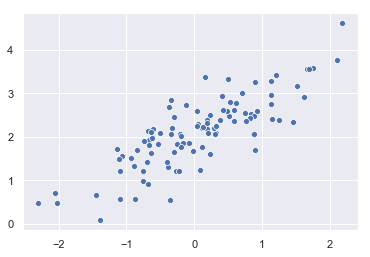

In [10]:
sns.scatterplot(x=X, y=Y);

Positive linear relationship between x and y with variance in the data (... as expected since we created this model...)

## Task e)

Now fit a least squares linear model (this is our model 2) to predict Y using X (which will yield $\hat{Y}$). Comment on the model obtained (use .summary() and the mean squared error of the residuals. 

How do $\hat{β_0}$ and $\hat{β_1}$ of model 2 compare to $β_0$ and $β_1$ of the (real) population model (i.e. model 1)?

In [15]:
df = pd.DataFrame({'FacebookAds': X, 'Umsatz': Y})

In [20]:
import scipy.stats

stats.pearsonr(df['FacebookAds'], df['Umsatz'])

(0.8187729314108482, 2.355164576996558e-25)

In [17]:
# Fit Model
lm = smf.ols(formula='Umsatz ~ FacebookAds', data=df).fit()

In [18]:
# Print summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Umsatz   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     199.3
Date:                Wed, 10 Jul 2019   Prob (F-statistic):           2.36e-25
Time:                        09:21:17   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0735      0.047     44.128      0.000       1.980       2.167
FacebookAds     0.7477      0.053     14.118      0.000       0.643       0.853
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Mean squared error of residuals
lm.mse_resid

0.0549412952933593

The linear regression fits a model which is almost true to the values of the coefficients of the population model (as we constructed it). The predictor x is highly statistically significant and we can observe a large F-statistic with a near-zero p-value so the null hypothesis can be rejected. Our model explains around 78% of the variation in the data.

## Task f)

Display the least squares regression line on the scatterplot obtained in (d) in the color red. Furthermore, draw the population regression line (model 1) on the plot in blue color. Add a legend.

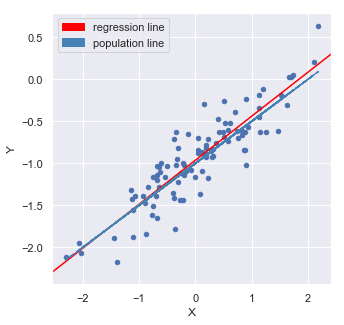

In [20]:
# Scatter Plot 
scatter = df.plot(x='X', y='Y', kind='scatter', figsize=(5,5))
# Regression line
line = abline_plot(model_results=lm, ax=scatter, color='red');
# Add Legend
red_patch = mpatches.Patch(color='red', label='regression line')
blue_patch = mpatches.Patch(color='steelblue', label='population line')
plt.legend(handles=[red_patch, blue_patch]);
# Population line (real parameters)
plt.plot(X, (-1 + 0.5*X), linestyle='dashed', color='steelblue');

/Users/jankirenz/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


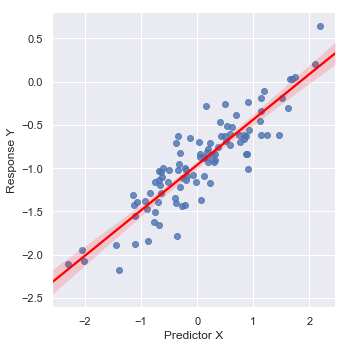

In [21]:
# Regression line with seaborne 
plot = sns.lmplot(x='X', y='Y', data=df, order=1, 
                  line_kws={'color':'red', 'label': 'regression line'}, 
                  height=5, aspect=1, ci=95);
plot = (plot.set_axis_labels("Predictor X", "Response Y"))

### Task g) 

Now fit a polynomial regression model that predicts Y using X and $X^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [22]:
# Fit Model
lm_2 = smf.ols(formula='Y ~ X + I(X**2)', data=df).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           1.32e-34
Time:                        15:31:00   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9663      0.029    -33.486      0.000      -1.024      -0.909
X              0.5234      0.027     19.582      0.000       0.470       0.576
I(X ** 2)      0.0039      0.021      0.181      0.856      -0.038       0.046
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Mean squared error of residuals
lm_2.mse_resid

0.055488894520680836

Arguments, that the polynomial provides a **better** fit:
- $\beta_0$ and $\beta_1$ are slightly closer to $\hat{\beta_0}$ and $\hat{\beta_1}$
   
Arguments, that the polynomial provides **not a better** fit:
- While $R^2$ is same for both models, $Adj. R^2$ (which takes model complexity into account) is slightly lower (worse)
- $\beta_0$ and $\beta_1$ have slightly higher standard error
- $\beta_2$ with $p = 0.856$ is not signifcant
- Scores for AIC and BIC are higher (worse)

In particular, the p-value of the t-statistic suggests that there isn’t a significant relationship between Y and $X^2$ why we should use the model in (e). This makes sense since we know the true population model doesn't contain a quadratic relationship.

## Task h)

Repeat (a)–(f) after modifying the data generation process in such a way that there is **less noise** in the data. The model 1 should remain the same. 

You can do this by decreasing the standard deviation of the normal distribution used to generate the **err** (error) term in (b) (use sd = 0.05). Describe your results.

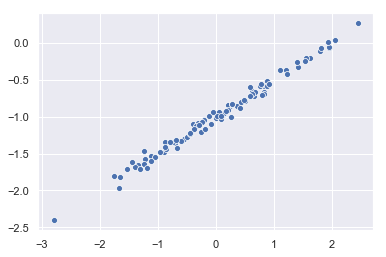

In [24]:
# a) Normal distributed values, with mean = 0 and sd = 1
X_h = np.random.normal(0, 1, 100)
# b) with lower standard deviation 
err_h = np.random.normal(0, 0.05, 100)
# c) Model
Y_h = -1 + 0.5 * X_h + err_h
# d) Scatterplot
sns.scatterplot(x=X_h, y=Y_h);

Positive linear relationship between x2 and y2 with only little variance in the data (... as expected since we created this model...).

In [30]:
# e)
df_h = pd.DataFrame({'X': X_h, 'Y': Y_h})
lm_h = smf.gls(formula='Y ~ X', data=df_h).fit()
lm_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.989
Model:                            GLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     8662.
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           1.97e-97
Time:                        15:52:33   Log-Likelihood:                 151.58
No. Observations:                 100   AIC:                            -299.2
Df Residuals:                      98   BIC:                            -293.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0010      0.005   -186.443      0.000      -1.012      -0.990
X              0.4972      0.005     93.071      0.000       0.487       0.508
==============================================================================
Omnibus:                        0.426   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.808   Jarque-Bera (JB):                0.121
Skew:                          -0.045   Prob(JB):                        0.941
Kurtosis:                       3.145   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Mean squared error of residuals
lm_h.mse_resid

0.0028822241872296854

We can observe very good results ... which is not surprising since we have an almost perfect linear relationship between $Y_h$ and $X_h$.

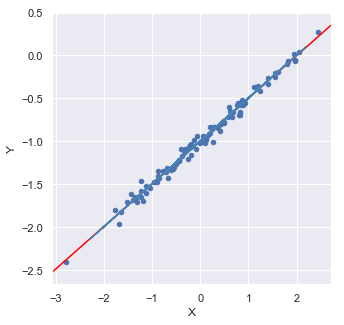

In [27]:
# f)
# Scatter Plot 
scatter = df_h.plot(x='X', y='Y', kind='scatter', figsize=(5,5))
# Regression line
line = abline_plot(model_results=lm_h, ax=scatter, color='red');
# Add Legend
red_patch = mpatches.Patch(color='red', label='regression line')
blue_patch = mpatches.Patch(color='steelblue', label='population line')
#plt.legend(handles=[red_patch, blue_patch]);
# Population line (real parameters)
plt.plot(X, (-1 + 0.5*X), linestyle='dashed', color='steelblue');

Almost identical... (perfect fit)

## Task i)

What are the confidence intervals for $β_0$ and $β_1$ based on the original data set (used in e) and the less noisy data set (created in h)? Comment on your results.

In [28]:
print('.'*35)
print ('95% CI noisier data (SD = 0.25):')
display(lm.conf_int())
print('.'*35)
print ('95% CI less noisy data (SD = 0.05):')
lm_h.conf_int()

...................................
95% CI noisier data (SD = 0.25):


,0,1
Intercept,-1.009870,-0.916623
X,0.471307,0.576407


...................................
95% CI less noisy data (SD = 0.05):


,0,1
Intercept,-1.011645,-0.990336
X,0.486611,0.507814


For the less noisy data set, the confidence intervals for both coefficients are more narrow.

## Task j)

What are the standard errors for $β_0$ and $β_1$ based on the original data set (used in e) and the less noisy data set (created in h)? Comment on your results.

In [29]:
# standard error (se) of paramters (b)
print('.'*35)
print ('SE for noisier data (SD = 0.25):')
display(lm.bse)
print('.'*35)
print ('SE for less noisy data (SD = 0.05):')
lm_h.bse

...................................
SE for noisier data (SD = 0.25):


Intercept    0.023494
X            0.026481
dtype: float64

...................................
SE for less noisy data (SD = 0.05):


Intercept    0.005369
X            0.005342
dtype: float64

The very small standard errors in the less noisy data set indicate that most sample means are similar to the population mean (i.e., our sample parameters accurately reflect the population mean).